In [1]:
from keras.models import load_model
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras import backend as K

import pickle 
import numpy as np
import pandas as pd
import scipy
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, classification_report

Using TensorFlow backend.


In [2]:
tf_config = K.tf.ConfigProto()
tf_config.gpu_options.allow_growth = True
session = K.tf.Session(config=tf_config)
K.set_session(session)

In [3]:
model = load_model('/data/Data/yntn/model_LSTM_w8.hdf5')

In [4]:
word_dict = pickle.load (open("/data/Data/yntn/word_embedding_vec.pkl",'rb'))

In [5]:
tok = pickle.load (open("/data/Data/yntn/emotion-detection-from-text/tokenize.pkl",'rb'))

In [6]:
df = pd.read_csv ('/data/Data/yntn/test.csv')

In [9]:
Y = df.target
le = LabelEncoder()
Y = le.fit_transform(Y)

In [10]:
def detect_emotion(arr):
    max_words = 88860
    max_len = 30
    test = [str(s) for s in arr]
    sequences = tok.texts_to_sequences(test)
    sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)
    emotion = []
    print(    sequences_matrix.shape)
    rs = model.predict( sequences_matrix , batch_size=1024, verbose=1, steps=None)
    return (rs)

In [11]:
X = df.status
Y = df.target

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state=42)

In [12]:
test_list = X.tolist()
label_list = le.transform(Y.tolist())

In [13]:
final = detect_emotion(test_list)

(401378, 30)
401378/401378 [==============================] - 8s 20us/step


In [14]:
final = np.argmax(final,axis=1)

TÍNH F1

In [15]:
precision_score(label_list, final, average='macro')

/data/Data/khoint3/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.2152171548560145

In [16]:
recall_score(label_list, final, average='macro')

0.08923735806621787

In [17]:
f1_score(label_list, final, average='macro')

/data/Data/khoint3/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.06600562163879908

CONFUSION MATRIX

In [18]:
cm = confusion_matrix(label_list, final)

In [19]:
import seaborn

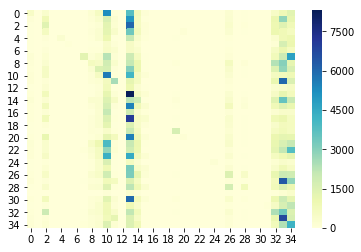

In [20]:
seaborn.heatmap(cm, cmap="YlGnBu")

In [21]:
x=[sum(cm[i]) - cm[i,i] for i in range (35)]
y=[sum(cm[i]) for i in range (35)]

In [22]:
cm_pcnt  = [cm[i]/y[i]*100 for i in range (35)]

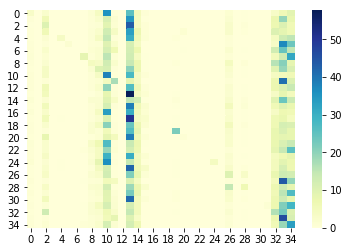

In [23]:
seaborn.heatmap(cm_pcnt, cmap="YlGnBu")

CORRELATION

In [24]:
tag_label = [(str(le.inverse_transform([i])[0])) for i in range(35)]

In [25]:
cls_report = classification_report(label_list, final, target_names=tag_label, output_dict=True)

/data/Data/khoint3/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/data/Data/khoint3/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/data/Data/khoint3/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
outfile = "classification_report.txt"
with open(outfile, "w") as f:
    f.write(cls_report)

In [27]:
arr_f1_score = []
arr_support = []
for i in range (35):    
    arr_f1_score.append(cls_report[tag_label[i]]['f1-score'])
    arr_support.append(cls_report[tag_label[i]]['support'])                   

In [28]:
np.corrcoef(arr_f1_score, arr_support)

array([[1.        , 0.23226764],
       [0.23226764, 1.        ]])

In [29]:
scipy.stats.spearmanr(arr_f1_score, arr_support)

SpearmanrResult(correlation=0.3731037784922783, pvalue=0.027275613016414176)

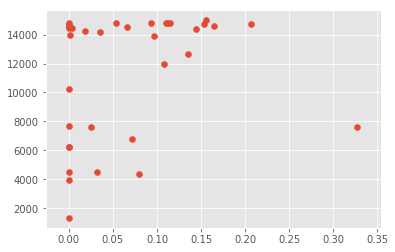

In [30]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

plt.scatter(arr_f1_score, arr_support)
plt.show()

In [31]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

In [32]:
with open("stop_word.txt",'r') as f :
    sw = f.readlines()
for i in range (len(sw)):
    sw[i] = sw[i].strip('\n')

In [33]:
def word_cloud_plot(text,label):    
    wordcloud = WordCloud().generate(text)
    wordcloud = WordCloud(background_color="white").generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.savefig("word_cloud/" + label +".png")

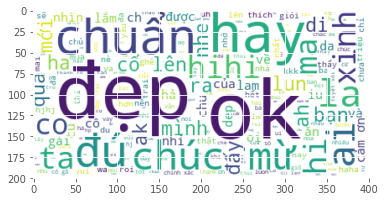

In [34]:
for i in range(35):
    data = df.text[df.label == tag_label[i]]
    text = " ".join(str(row) for row in data)   
    for j in range(len(sw)):
        text = text.replace(sw[j],'')
    if i == 4:
        text = text.replace('chị','')
    word_cloud_plot(text,tag_label[i])

In [36]:
tag_label

['bạo lực',
 'broken heart',
 'buồn',
 'buồn ngủ ',
 'buồn nôn ',
 'cảm ơn',
 'chào',
 'cố lên',
 'cười gian',
 'cười lớn ',
 'giận',
 'hôn',
 'im',
 'khóc lớn',
 'lêu lêu ',
 'lo lắng ',
 'mắng',
 'mệt',
 'ngạc nhiên',
 'ngon miệng',
 'ngủ ngon',
 'ngầu',
 'ok',
 'phản đối',
 'shit',
 'sợ',
 'suy ngẫm',
 'tặng hoa',
 'thắc mắc',
 'tiền',
 'trầm trồ ',
 'vỗ tay ',
 'vui',
 'yêu',
 'đồng ý ']

In [ ]:
if (chương trình bình thường):
    if (sum < 200k):
        mua tới full 200k
    else:
        mua tới bông tẩy trang
else: #tức là chuowgn trình tèo trước hạn
    mua tới bông tẩy trang and not mua dầu gội